In [ ]:
# https://drive.google.com/file/d/1wNuEk7euCnCoiZiF4UVSFk8bqFoPJG-v/view?usp=sharing
!pip install -U --no-cache-dir gdown --pre
!pip install featuretools
!pip install feature-engine
!pip install h2o
# !gdown 1wNuEk7euCnCoiZiF4UVSFk8bqFoPJG-v
!gdown "1wNuEk7euCnCoiZiF4UVSFk8bqFoPJG-v&confirm=t"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.1/620.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.0/231.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is inco

# Vấn đề
Trong xã hội ngày nay, việc dự đoán tuổi thọ và ước tính thời gian mỗi người có thể sống được là một thách thức lớn đối với cả y học và khoa học dữ liệu. Với sự phát triển của công nghệ và dữ liệu, chúng ta có cơ hội tiếp cận các phương pháp mới để xây dựng các mô hình dự đoán chính xác hơn về tuổi thọ.\
Việc dự đoán tuổi thọ không chỉ là một bài toán khoa học mà còn là một vấn đề có ý nghĩa lớn đối với xã hội.
# Mục đích
Mục tiêu của notebook này là sử dụng các phương pháp phân tích dữ liệu và học máy để xây dựng một mô hình dự đoán tuổi thọ. Bằng cách phân tích các mối quan hệ giữa các đặc trưng trong tập dữ liệu, chúng tôi hy vọng rằng mô hình của chúng tôi có thể cung cấp những ước tính chính xác về tuổi thọ của một người dựa trên thông tin ngây thơ, khái quát của một người

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import featuretools as ft
import feature_engine.selection
import sklearn.preprocessing
import h2o
from h2o.automl import H2OAutoML

# for drawing
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import seaborn as sns

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwv8lbx_v
  JVM stdout: /tmp/tmpwv8lbx_v/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpwv8lbx_v/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_unknownUser_v91n53
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Dataset overview

In [ ]:
age = pd.read_csv('./AgeDataset-V5.csv')
age = age.drop(['Unnamed: 0'],axis=1)
age


,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...,...
1223004,Q77247326,Marie-Fortunée Besson,Frans model (1907-1996),Female,France,Tailor; model,1907,1996.0,NaN,89.0
1223005,Q77249504,Ron Thorsen,xugador de baloncestu canadianu (1948–2004),Male,Canada; United States of America,Athlete,1948,2004.0,NaN,56.0
1223006,Q77249818,Diether Todenhagen,German navy officer and world war II U-boat co...,Male,Germany,Military personnel,1920,1944.0,NaN,24.0
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,NaN,28.0


Giá trị null

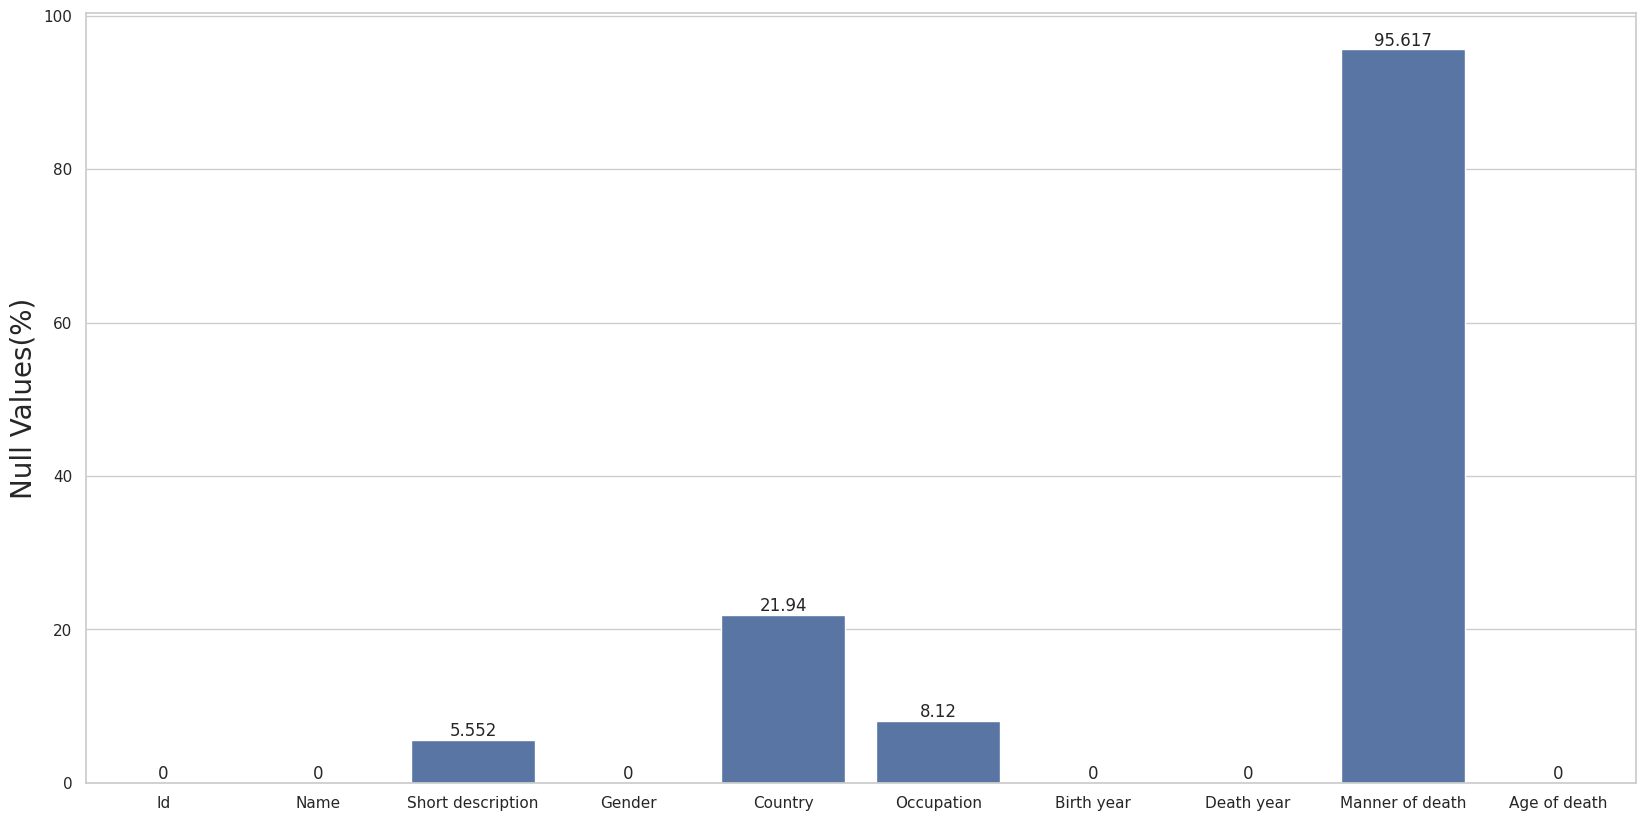

In [ ]:
col_names = list(age.isna().sum().keys())
col_null_count = list(age.isna().sum().values)
percentage_null_value = [round((x/age.shape[0])*100,3) for x in col_null_count]
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
p = sns.barplot(x=col_names, y=percentage_null_value)
p.set_ylabel("Null Values(%)", fontsize = 20)
for i in p.containers:
    p.bar_label(i,)

In [ ]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1223009 non-null  object 
 4   Country            954685 non-null   object 
 5   Occupation         1123701 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


Với cột bao gồm như tên, mô tả ngắn gọn của họ, nghề nghiệp chính, năm sinh, năm mất, nguyên nhân cái chết, tuổi thọ... Số hàng cho ta biết được dữ liệu thống kê được tổng cộng 1223009 người khác nhau.\
*Nguồn*: \
https://workshop-proceedings.icwsm.org/abstract?id=2022_82 \
https://www.kaggle.com/datasets/imoore/age-dataset/data \
<br>
Mục đích chính của ta là dự đoán Age of death (tuổi thọ) nên trước khi tiến hành phân tích dữ liệu, features hay làm sạch ta cần xác định sử dụng những features nào để dự đoán ?\
Như đã đề cập ta mong muốn một mô hình có thể cho ra kết quả là tuổi thọ của người khỏe mạnh thông thường nên những dữ liệu mà có thể quan tâm sẽ là: \
- Gender
- Country
- Occupation
- Birth year

Có nhiều nguyên nhân cho việc không sử dụng các cột khác trừ cột Age of death trong trường hợp này:\
&nbsp;&nbsp;&nbsp;&nbsp;1. Ta mong muốn dự đoán cho một người khỏe mạnh <br>
&nbsp;&nbsp;&nbsp;&nbsp;2. Thông tin mang tính chủ quan sẽ bị loại bỏ vì chúng thường không thống nhất.

Text(0.5, 1.0, 'Age histogram')

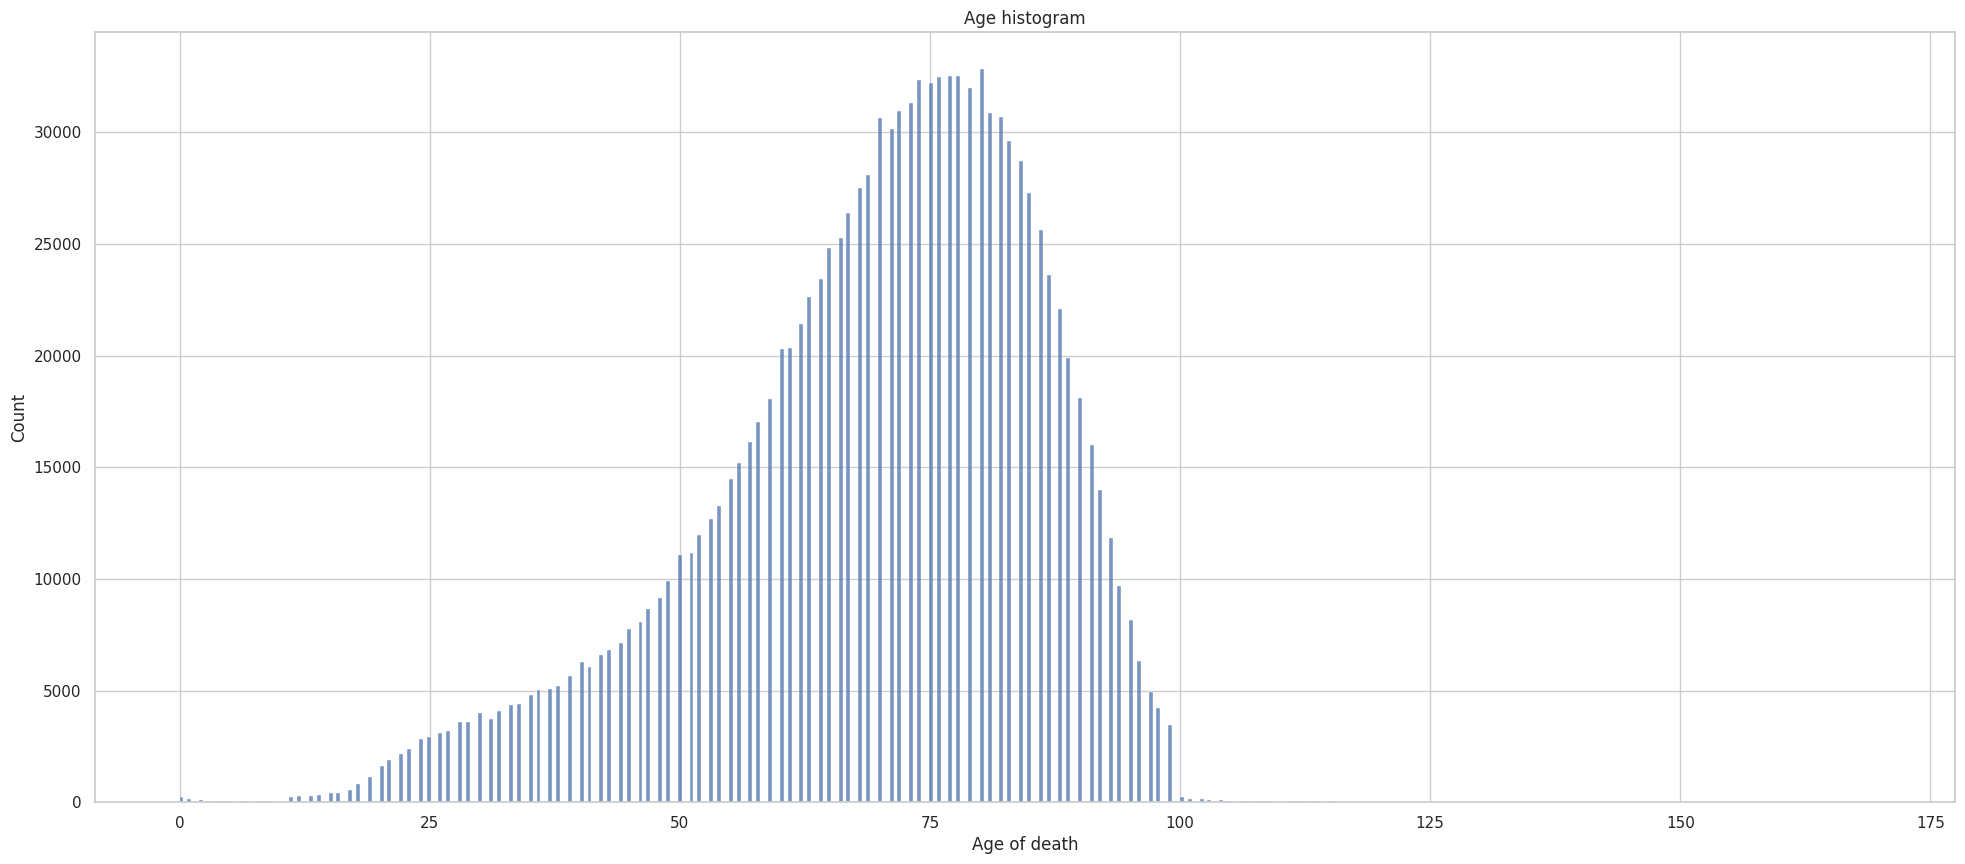

In [ ]:
# plt of age histogram age dagtaset
plt.figure(figsize=(24,10))

sns.histplot(age['Age of death'])

plt.title(f'Age histogram')

# Phân tích dữ liệu

Ta sẽ loại bỏ những cột không cần thiết để phục vụ việc phân tích

In [ ]:
age.drop(['Id','Name','Short description','Manner of death'],axis=1,inplace=True)
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Gender        1223009 non-null  object 
 1   Country       954685 non-null   object 
 2   Occupation    1123701 non-null  object 
 3   Birth year    1223009 non-null  int64  
 4   Death year    1223008 non-null  float64
 5   Age of death  1223008 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 56.0+ MB


In [ ]:
age

,Gender,Country,Occupation,Birth year,Death year,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Male,United Kingdom,Artist,1952,2001.0,49.0
2,Male,United States of America,Politician,1809,1865.0,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0
...,...,...,...,...,...,...
1223004,Female,France,Tailor; model,1907,1996.0,89.0
1223005,Male,Canada; United States of America,Athlete,1948,2004.0,56.0
1223006,Male,Germany,Military personnel,1920,1944.0,24.0
1223007,Male,United Kingdom,Artist,1887,1915.0,28.0


In [ ]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Gender        1223009 non-null  object 
 1   Country       954685 non-null   object 
 2   Occupation    1123701 non-null  object 
 3   Birth year    1223009 non-null  int64  
 4   Death year    1223008 non-null  float64
 5   Age of death  1223008 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 56.0+ MB


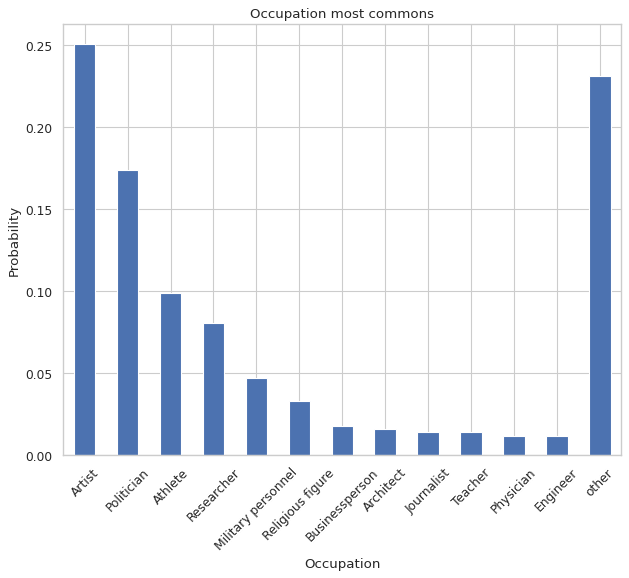

In [ ]:
figure(figsize=(9, 7), dpi=80)
prob = age['Occupation'].value_counts(normalize=True)
threshold = 0.01
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.title('Occupation most commons')
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()

## Năm sinh ảnh hưởng thế nào tới đời sống của người đó ?
Đời sống phát triển theo từng niên đại cũng cho thất tuổi thọ của con người luôn có xu hướng tăng dần theo thời gian đó là những gì ta biết về nó. Và ta cần xem xét dữ liệu có phản ánh điều đó hay không.\
Ta sẽ thêm 2 cột để xác định thời điểm sống và chết của mỗi người trong tập dữ liệu

In [ ]:
# transfrom to century with birht year
def transform_year(year):
  if year%100 > 0:
    return year//100 + 1
  else:
    return year//100

# Century birth and Death
age['Birth century'] = age['Birth year'].apply(lambda x:transform_year(x))
age['Death century'] = age['Death year'].apply(lambda x:transform_year(x))


age.head(10)

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0,18,18.0
1,Male,United Kingdom,Artist,1952,2001.0,49.0,20,21.0
2,Male,United States of America,Politician,1809,1865.0,56.0,19,19.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0,18,18.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0,18,19.0
5,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,42.0,18,19.0
6,Male,France,Artist,1888,1976.0,88.0,19,20.0
7,Male,France,Artist,1840,1926.0,86.0,19,20.0
8,Male,Spain,Artist,1599,1660.0,61.0,16,17.0
9,Male,Spain; Republic of Venice,Artist,1541,1614.0,73.0,16,17.0


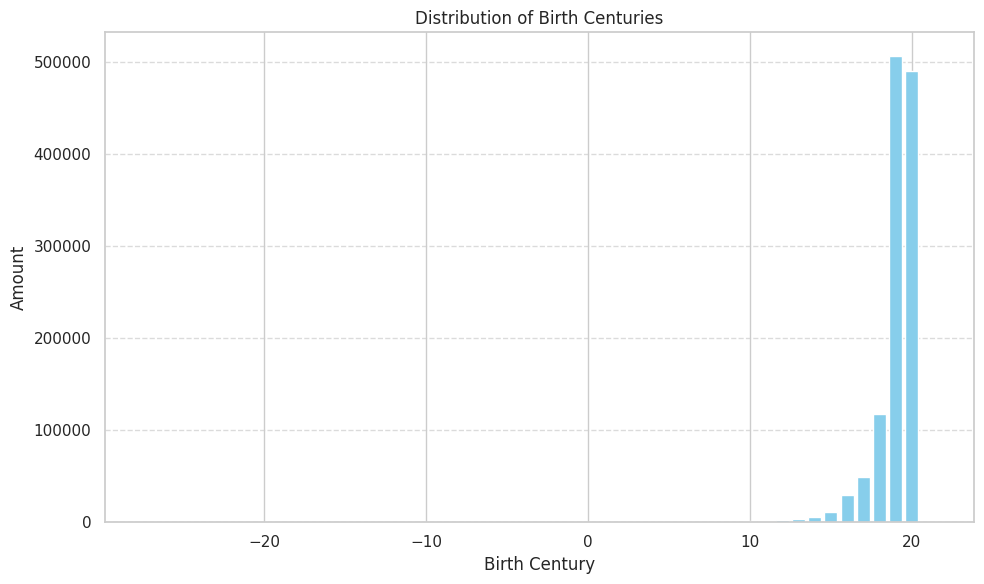

In [ ]:
birth_century_counts = age['Birth century'].value_counts()


sorted_birth_century_counts = dict(sorted(birth_century_counts.items()))

plt.figure(figsize=(10, 6))
plt.bar(sorted_birth_century_counts.keys(), sorted_birth_century_counts.values(), color='skyblue')
plt.xlabel('Birth Century')
plt.ylabel('Amount')
plt.title('Distribution of Birth Centuries')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Số lượng người ít tại những người sống tại năm trước công nguyên, có lẽ ta sẽ không quan tâm đến những người đã sống cách đây quá xa thời điểm hiện tại, cũng vì lượng dữ liệu của nhóm người này hạn chế nên không thể đánh giá dựa vào chúng tránh khiến mô hình của ta trở nên overfitting với chúng

Tuổi trung bình của người qua từng thời kỳ trước công nguyên

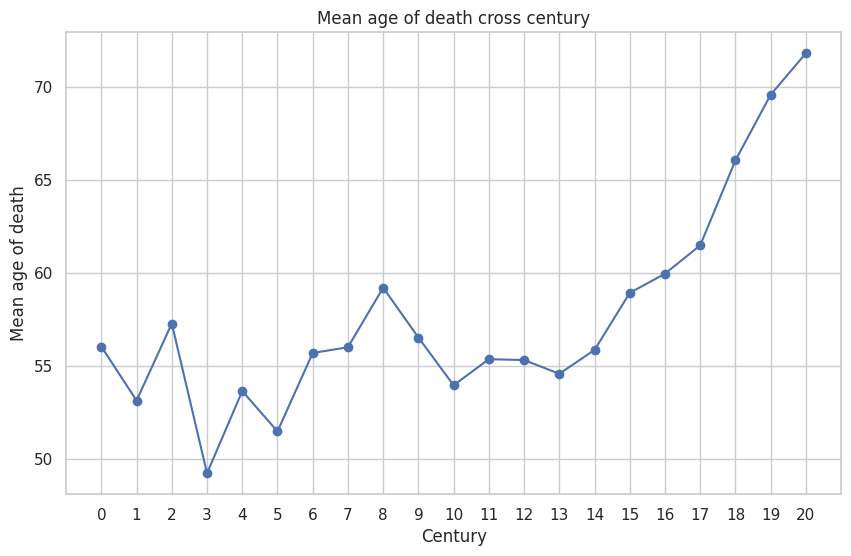

In [ ]:
mean_ages = []

for century in range(0,21):
  mean = age.loc[(age['Birth century'] == century),'Age of death'].mean()
  mean_ages.append(mean)

plt.figure(figsize=(10,6))
plt.plot(range(0, 21), mean_ages, marker='o', linestyle='-')
plt.title('Mean age of death cross century')
plt.xlabel('Century')
plt.ylabel('Mean age of death')
plt.xticks(range(0,21))
plt.show()


Ta sẽ chỉ lấy dữ liệu của người sống ở thể ký 18, 19, 20 trong notebook này. Đồng thời ta sẽ kiểm ta phân phối năm sinh đối với tuôi trung bình.\
Đối với người sống ở thế kỉ 21 có trong dữ liệu ta sẽ gộp chúng với thế kỉ 20

In [ ]:
age = age.drop(age[age['Birth century'] < 18].index)

age.replace({'Birth century': 21}, 20, inplace=True)
age['Birth century'].unique()

array([18, 20, 19])

In [ ]:
age['Birth year'].value_counts()

Birth year
1920    13468
1921    13373
1922    12856
1924    12856
1923    12691
        ...  
2012        1
2009        1
2006        1
2014        1
2008        1
Name: count, Length: 314, dtype: int64

Ta sẽ làm sạch dữ liệu nhằm tránh tình trạng mất cân bằng

In [ ]:
threshold = 1000
counts = age['Birth year'].value_counts()
rare_occupations = counts[counts < threshold].index
age = age[~age['Birth year'].isin(rare_occupations)]


In [ ]:
age['Birth year'].value_counts()

Birth year
1920    13468
1921    13373
1924    12856
1922    12856
1923    12691
        ...  
1744     1053
1963     1048
1746     1046
1735     1016
1743     1006
Name: count, Length: 223, dtype: int64

Dữ liệu sau khi được làm sạch, ta sẽ xét độ tuổi trung bình theo năm sinh

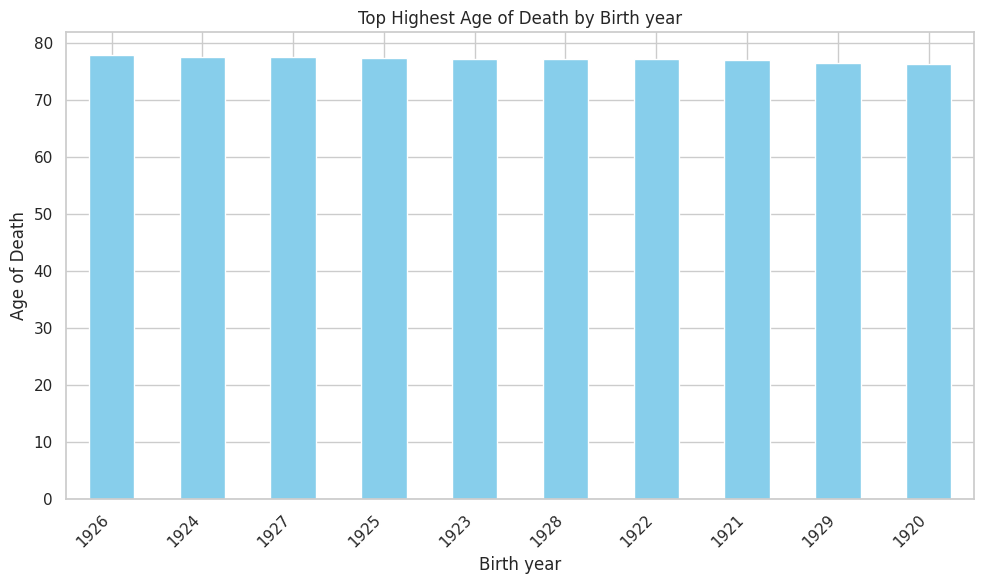

In [ ]:
max_age_by_birth_year = age.groupby('Birth year')['Age of death'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
max_age_by_birth_year.plot(kind='bar', color='skyblue')
plt.title('Top Highest Age of Death by Birth year')
plt.xlabel('Birth year')
plt.ylabel('Age of Death')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Giới tính


Ở tập dữ liệu, ta có thể thấy rất nhiều giới tính khác nhau được đề cập:

In [ ]:
age['Gender'].unique()

array(['Male', 'Female', 'Transgender Female', 'Intersex',
       'Transgender Person; Intersex; Transgender Male', 'Non-Binary',
       'Other', 'Intersex; Male', 'Transgender Male',
       'Transgender Female; Female', 'Transgender Female; Male',
       'Female; Male', 'Intersex; Transgender Male', 'Eunuch; Male',
       'Transgender Male; Female', 'Transgender Male; Male',
       'Intersex; Female', 'Transgender Female; Intersex',
       'Female; Female'], dtype=object)

In [ ]:
age['Gender'].value_counts()

Gender
Male                                              958223
Female                                            110116
Other                                               3489
Transgender Female                                    50
Transgender Male                                      30
Intersex                                               7
Female; Male                                           7
Transgender Male; Female                               3
Non-Binary                                             2
Transgender Female; Male                               2
Transgender Female; Intersex                           1
Intersex; Female                                       1
Transgender Male; Male                                 1
Transgender Female; Female                             1
Eunuch; Male                                           1
Intersex; Transgender Male                             1
Intersex; Male                                         1
Transgender Person; Inte

In [ ]:
len(age['Gender'].unique())

19

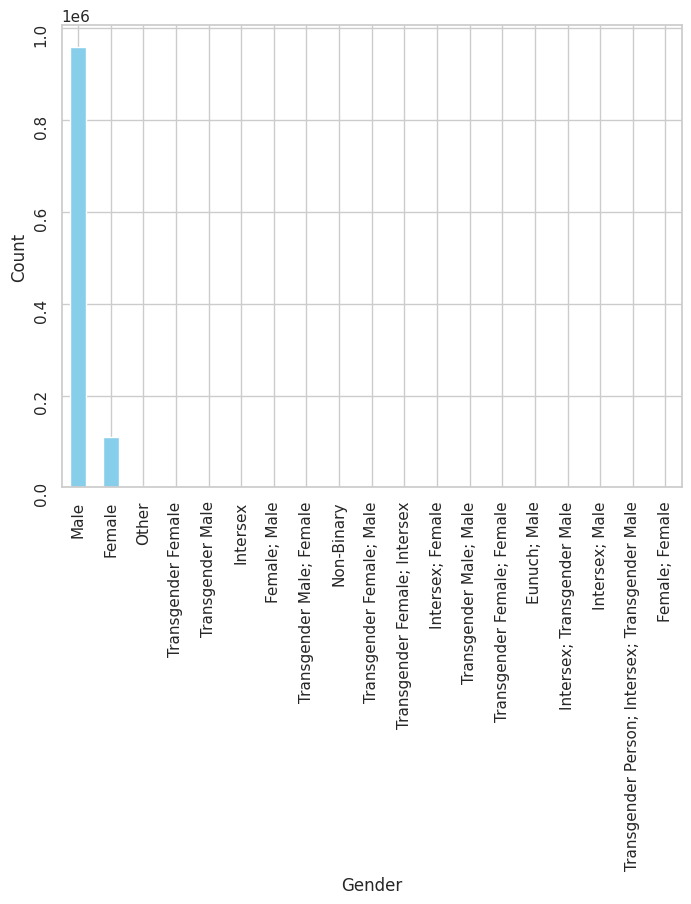

In [ ]:
plt.figure(figsize=(8, 6))
age['Gender'].value_counts().plot(kind='bar', color='skyblue')
# plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [ ]:
age['Gender'].value_counts()

Gender
Male                                              958223
Female                                            110116
Other                                               3489
Transgender Female                                    50
Transgender Male                                      30
Intersex                                               7
Female; Male                                           7
Transgender Male; Female                               3
Non-Binary                                             2
Transgender Female; Male                               2
Transgender Female; Intersex                           1
Intersex; Female                                       1
Transgender Male; Male                                 1
Transgender Female; Female                             1
Eunuch; Male                                           1
Intersex; Transgender Male                             1
Intersex; Male                                         1
Transgender Person; Inte

Ta sẽ quy chuẩn về 3 giới tính duy nhất đó là Male, Female, Others.

In [ ]:
# replace all values except 'Male' and 'Female' with 'Others'
age['Gender'].replace(to_replace=age['Gender'].unique().tolist()[2:], value='Others', inplace=True)


<ipython-input-25-0211099efb5d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  age['Gender'].replace(to_replace=age['Gender'].unique().tolist()[2:], value='Others', inplace=True)


In [ ]:
age['Gender'].value_counts()

Gender
Male      958223
Female    110116
Others      3599
Name: count, dtype: int64

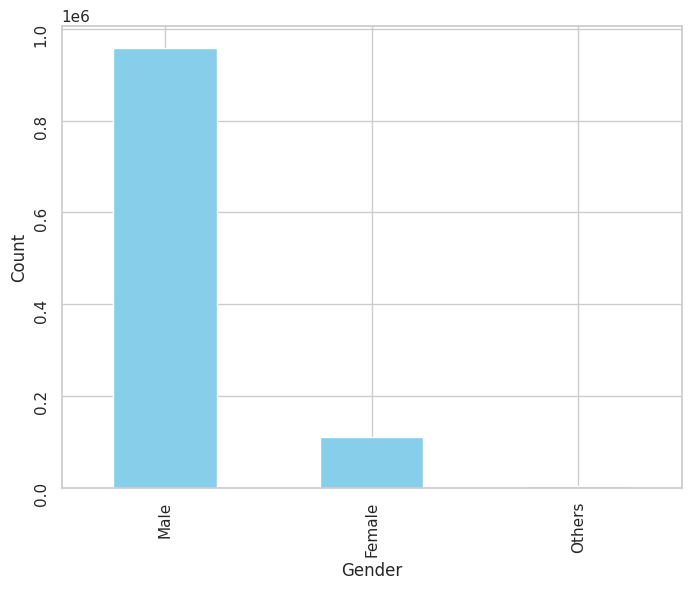

In [ ]:
plt.figure(figsize=(8, 6))
age['Gender'].value_counts().plot(kind='bar', color='skyblue')
# plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

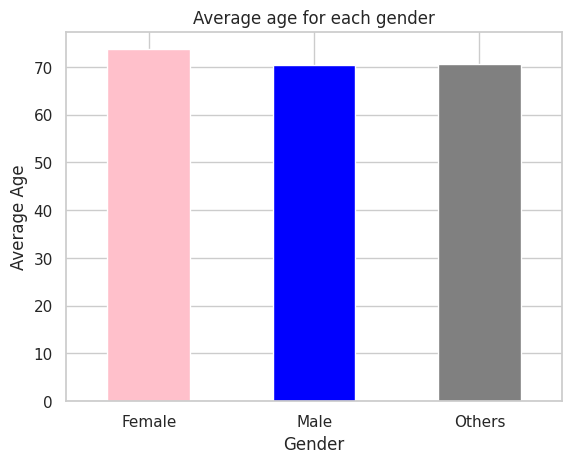

In [ ]:
mean_ages = []
genders = list(age['Gender'].unique())
# 'Male' ,'Female', 'Others'
age_gender =  age.groupby('Gender')['Age of death'].mean()

age_gender.plot(kind='bar',color=['pink','blue','gray'])
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Average age for each gender')
plt.xticks(rotation=0) # make text vertical
plt.show()

Độ chênh lệch độ tuổi với giới tính khi so sánh với nhau có vẻ không chênh lệch quá nhiều

## Nghề nghiệp


In [ ]:
age['Occupation'].value_counts()

Occupation
Artist                                         254162
Politician                                     173579
Athlete                                        107386
Researcher                                      83490
Military personnel                              46306
                                                ...  
conductor; bandleader; trombonist; composer         1
Smuggling; merchant                                 1
lexicographer; judge; writer                        1
ethnographer; writer                                1
Tailor; model                                       1
Name: count, Length: 27315, dtype: int64

Có vẻ số lượng nghề nghiệp khác nhau có tận gần 10000 nghề nghiệp khác nhau được đề cập trong tập dữ liệu, và ta có thể để ý tại cột ở dưới cùng ta có thể thấy rằng một số người có thể làm nhiều việc dhính cùng lúc cho tới khi họ chết (công việc mà họ dành nhiều thời gian làm nhất trong đời).\
Ta có thể xem xét một vài nghề nghiệp có số lượng người cao nhất (dựa theo trong tập dữ liệu).

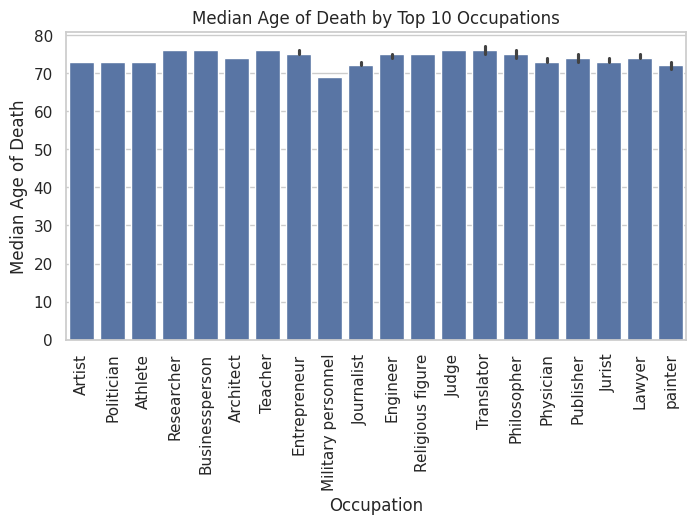

In [ ]:
top_occupations = age['Occupation'].value_counts().nlargest(20).index.tolist()

age_top_10 = age[age['Occupation'].isin(top_occupations)]

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(data=age_top_10, x='Occupation', y='Age of death', estimator=np.median)

plt.xticks(rotation=90)
plt.title('Median Age of Death by Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Median Age of Death')
plt.show()

In [ ]:
age

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
1,Male,United Kingdom,Artist,1952,2001.0,49.0,20,21.0
2,Male,United States of America,Politician,1809,1865.0,56.0,19,19.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0,18,18.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0,18,19.0
5,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,42.0,18,19.0
...,...,...,...,...,...,...,...,...
1223004,Female,France,Tailor; model,1907,1996.0,89.0,20,20.0
1223005,Male,Canada; United States of America,Athlete,1948,2004.0,56.0,20,21.0
1223006,Male,Germany,Military personnel,1920,1944.0,24.0,20,20.0
1223007,Male,United Kingdom,Artist,1887,1915.0,28.0,19,20.0


Nghề nghiệp có tuổi trung bình cao nhất dựa theo dữ liệu

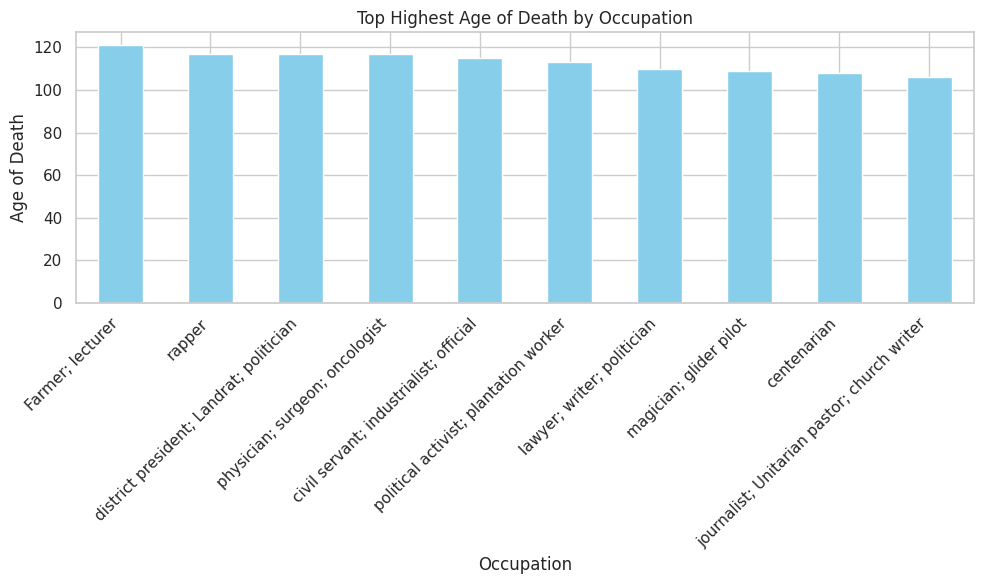

In [ ]:
max_age_by_occupation = age.groupby('Occupation')['Age of death'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
max_age_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Top Highest Age of Death by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Age of Death')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ta có thể nhận thấy rằng nghề nghiệp dẫn đầu thì tập dữ liệu lại có quá ít điều này ảnh hưởng tới performance của dự đoán

In [ ]:
len(age[age['Occupation']=='Farmer'])

1246

In [ ]:
age[age['Occupation']=='Comedian; jazz guitarist']

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
198386,Male,United States of America,Comedian; jazz guitarist,1911,2010.0,99.0,20,21.0


Và để cân bằng lại dữ liệu ta sẽ sử dụng nghề nghiệp khi mà tập dữ liệu không bị mất cân bằng quá lớn

In [ ]:
age['Occupation'] = age['Occupation'].str.lower()

threshold = 1000
counts = age['Occupation'].value_counts()
rare_occupations = counts[counts < threshold].index
age = age[~age['Occupation'].isin(rare_occupations)]
age['Occupation'].value_counts()

Occupation
artist                              254296
politician                          175307
athlete                             107407
researcher                           83540
military personnel                   47115
religious figure                     24486
businessperson                       18784
architect                            16422
journalist                           15655
teacher                              15308
engineer                             12953
physician                            12581
judge                                 7731
lawyer                                6821
entrepreneur                          4425
jurist                                4224
translator                            2853
publisher                             2491
philosopher                           2422
librarian                             1883
merchant                              1861
painter                               1851
entomologist                          1794


Sau khi làm sạch dữ liệu Occupation ta sẽ kiểm tra sự khác biệt

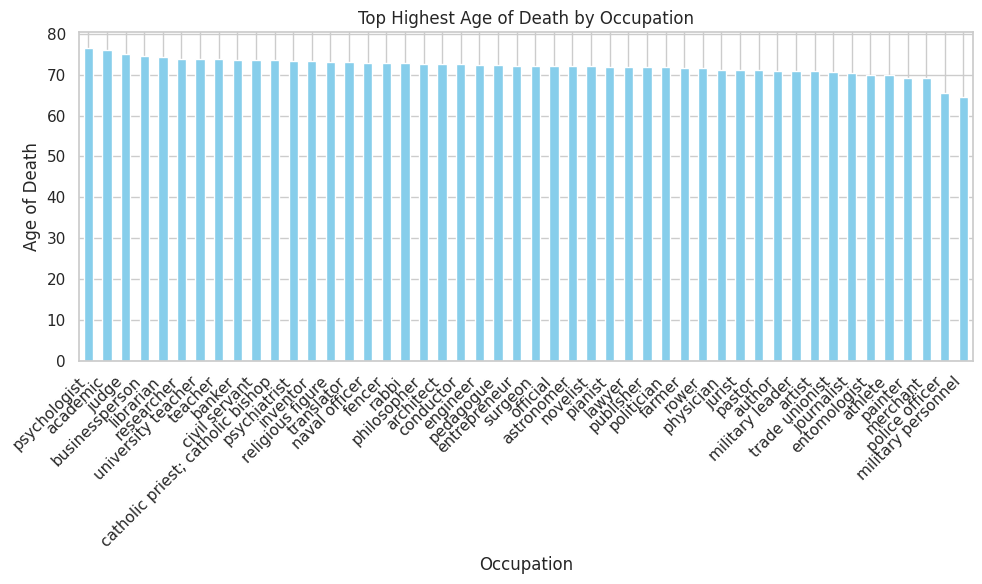

In [ ]:
max_age_by_occupation = age.groupby('Occupation')['Age of death'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
max_age_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Top Highest Age of Death by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Age of Death')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
age[age['Occupation'] == 'psychologist']

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
1841,Male,United States of America,psychologist,1884,1952.0,68.0,19,20.0
8291,Male,Germany,psychologist,1874,1932.0,58.0,19,20.0
13218,Male,Russia; Soviet Union,psychologist,1930,1998.0,68.0,20,20.0
14793,Male,Austria,psychologist,1874,1908.0,34.0,19,20.0
15437,Female,United States of America; Austria,psychologist,1908,1958.0,50.0,20,20.0
...,...,...,...,...,...,...,...,...
1210079,Female,United Kingdom,psychologist,1919,1998.0,79.0,20,20.0
1211427,Male,Denmark,psychologist,1940,2011.0,71.0,20,21.0
1213230,Female,Italy,psychologist,1920,2018.0,98.0,20,21.0
1213342,Female,NaN,psychologist,1932,2017.0,85.0,20,21.0


## Quốc tịch

In [ ]:
age['Country'].value_counts()

Country
United States of America                                       145003
Germany                                                         74763
France                                                          62736
United Kingdom; United Kingdom of Great Britain and Ireland     27358
Sweden                                                          22030
                                                                ...  
Canada; Ukraine; Soviet Union                                       1
Greece; Croatia                                                     1
Hungary; United States of America; Russian Empire                   1
Romania; Kingdom of Hungary; Kingdom of Romania                     1
El Salvador; British Empire                                         1
Name: count, Length: 4694, dtype: int64

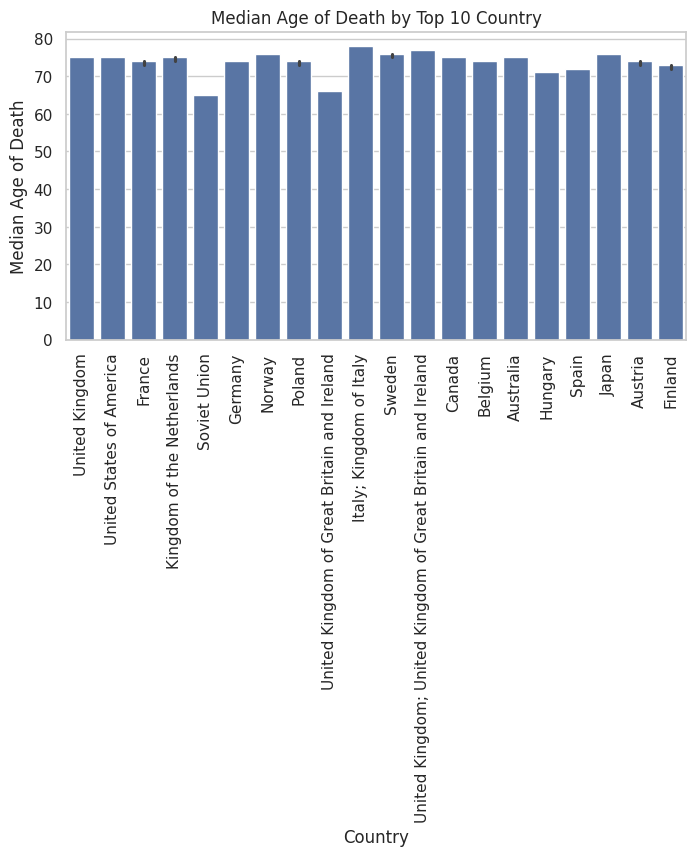

In [ ]:
top_occupations = age['Country'].value_counts().nlargest(20).index.tolist()

age_top_10 = age[age['Country'].isin(top_occupations)]

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(data=age_top_10, x='Country', y='Age of death', estimator=np.median)

plt.xticks(rotation=90)
plt.title('Median Age of Death by Top 10 Country')
plt.xlabel('Country')
plt.ylabel('Median Age of Death')
plt.show()

Dưới đây ta cũng xét quốc gia có độ tuổi trung bình cao nhất

<ipython-input-40-3bf33bce527e>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


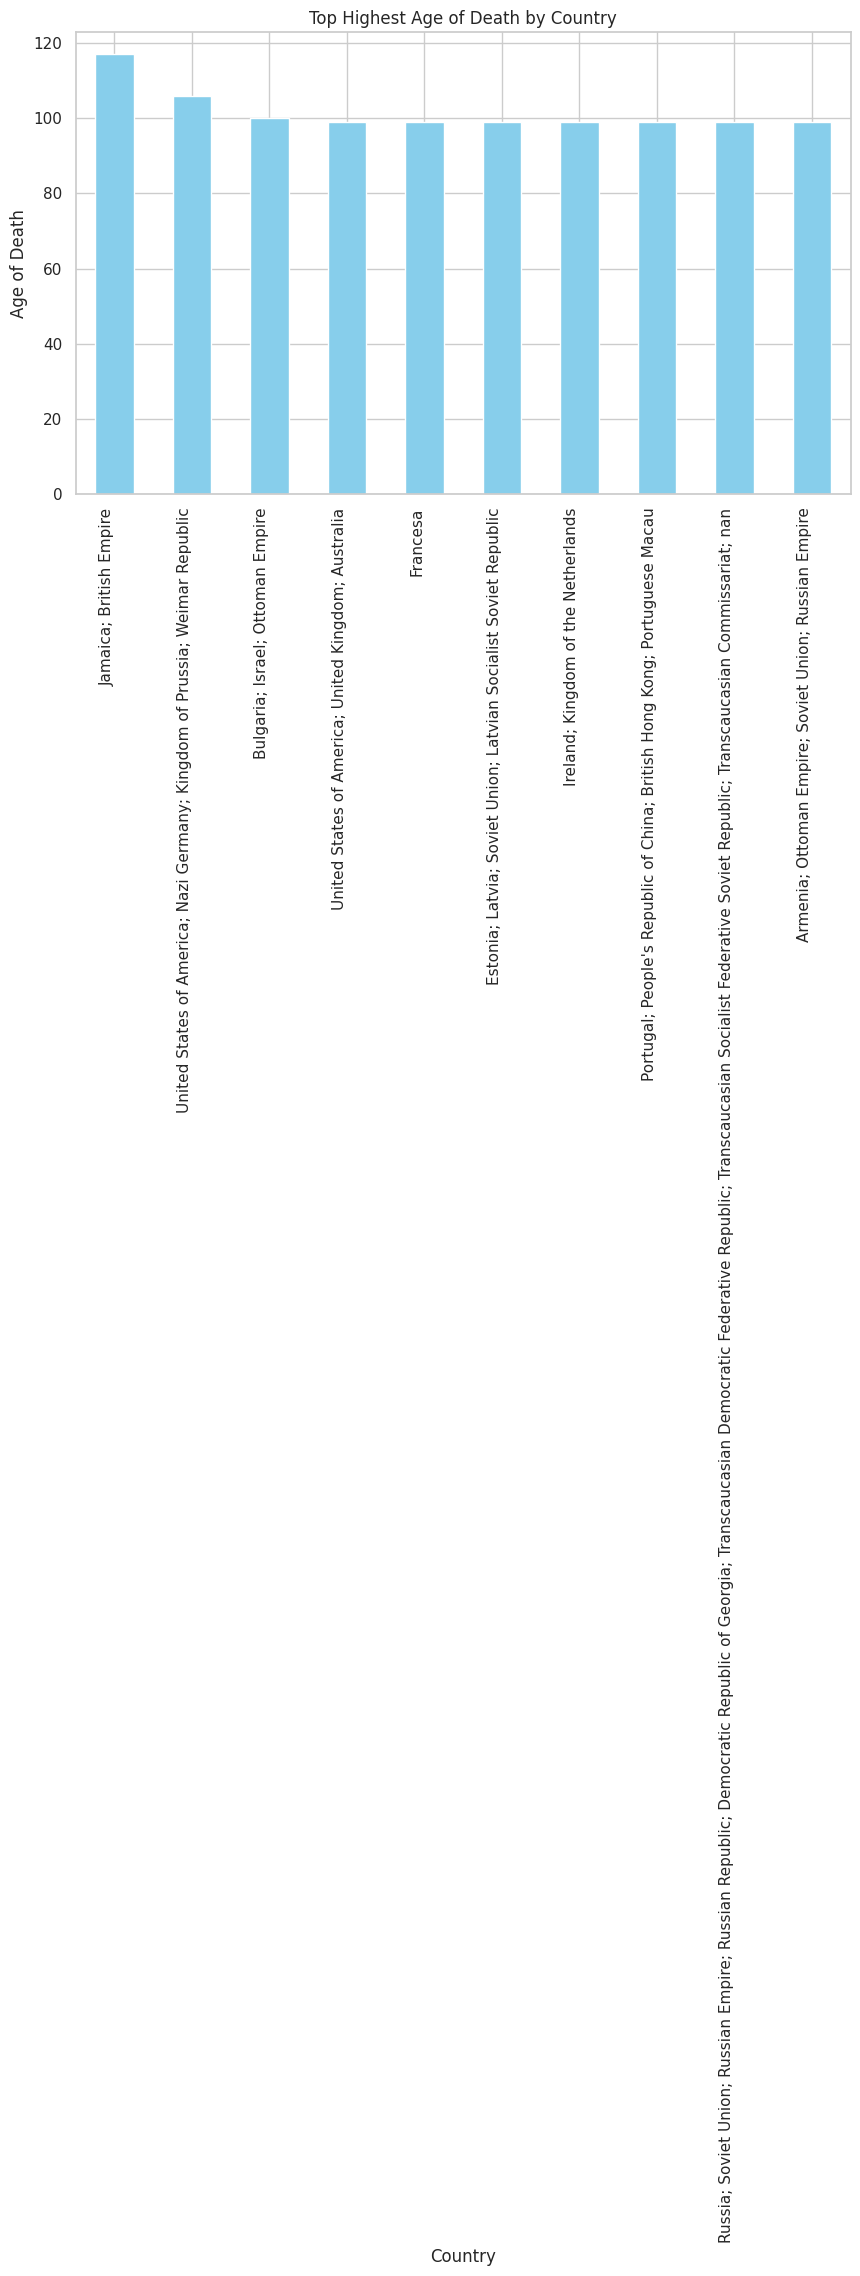

In [ ]:
max_age_by_occupation = age.groupby('Country')['Age of death'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
max_age_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Top Highest Age of Death by Country')
plt.xlabel('Country')
plt.ylabel('Age of Death')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


Vì thế ta sẽ làm sạch dữ liệu tương tự như với cách đã làm với nghề nghiệp ở trên

In [ ]:
threshold = 1000
counts = age['Country'].value_counts()
rare_occupations = counts[counts < threshold].index
age = age[~age['Country'].isin(rare_occupations)]


In [ ]:
age['Country'].value_counts()

Country
United States of America                                       145003
Germany                                                         74763
France                                                          62736
United Kingdom; United Kingdom of Great Britain and Ireland     27358
Sweden                                                          22030
                                                                ...  
German Democratic Republic                                       1157
Colombia                                                         1156
Cuba                                                             1067
Netherlands                                                      1032
Austrian Empire                                                  1028
Name: count, Length: 61, dtype: int64

In [ ]:
age

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
1,Male,United Kingdom,artist,1952,2001.0,49.0,20,21.0
2,Male,United States of America,politician,1809,1865.0,56.0,19,19.0
6,Male,France,artist,1888,1976.0,88.0,19,20.0
7,Male,France,artist,1840,1926.0,86.0,19,20.0
10,Male,United States of America,artist,1935,1977.0,42.0,20,20.0
...,...,...,...,...,...,...,...,...
1223001,Male,NaN,artist,1911,1979.0,68.0,20,20.0
1223003,Female,NaN,physician,1870,1956.0,86.0,19,20.0
1223006,Male,Germany,military personnel,1920,1944.0,24.0,20,20.0
1223007,Male,United Kingdom,artist,1887,1915.0,28.0,19,20.0


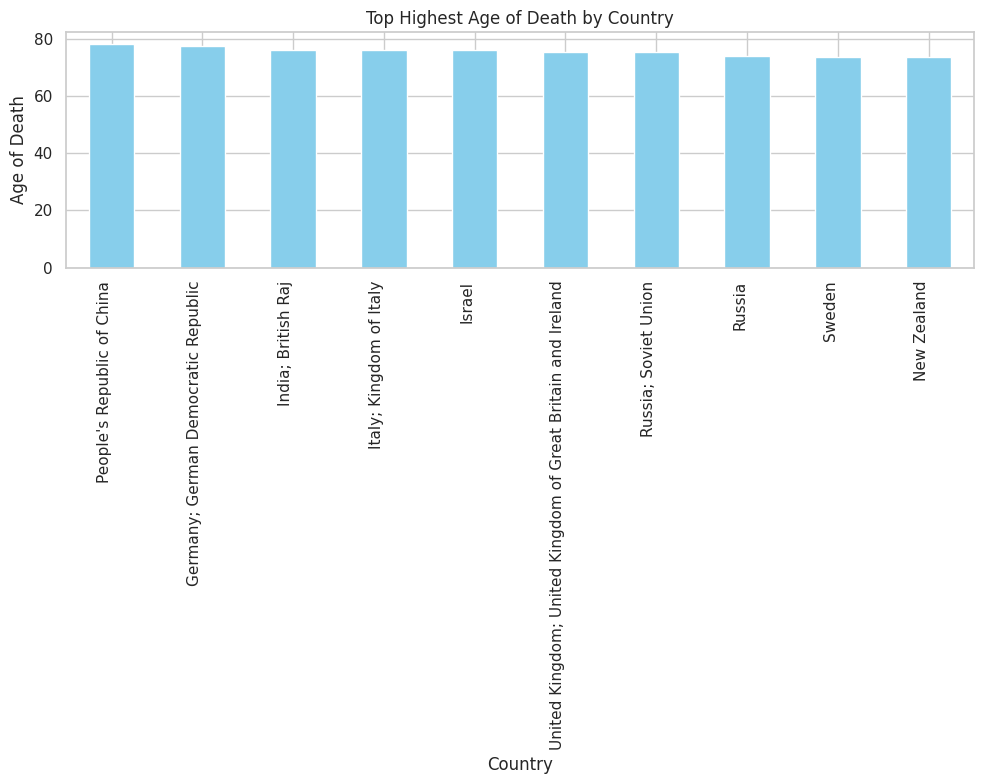

In [ ]:
max_age_by_occupation = age.groupby('Country')['Age of death'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,8))
max_age_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Top Highest Age of Death by Country')
plt.xlabel('Country')
plt.ylabel('Age of Death')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


Chúng ta muôn sử dụng các dữ liệu dạng chứ vì thế trước khi có thể đưa vào mô hình học máy hay học sâu bất kỳ thì ở đây chúng tôi sẽ sử dụng phương pháp label encoded cho chúng

In [ ]:
age

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
1,Male,United Kingdom,artist,1952,2001.0,49.0,20,21.0
2,Male,United States of America,politician,1809,1865.0,56.0,19,19.0
6,Male,France,artist,1888,1976.0,88.0,19,20.0
7,Male,France,artist,1840,1926.0,86.0,19,20.0
10,Male,United States of America,artist,1935,1977.0,42.0,20,20.0
...,...,...,...,...,...,...,...,...
1223001,Male,NaN,artist,1911,1979.0,68.0,20,20.0
1223003,Female,NaN,physician,1870,1956.0,86.0,19,20.0
1223006,Male,Germany,military personnel,1920,1944.0,24.0,20,20.0
1223007,Male,United Kingdom,artist,1887,1915.0,28.0,19,20.0


In [ ]:
data = age.dropna()
data

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
1,Male,United Kingdom,artist,1952,2001.0,49.0,20,21.0
2,Male,United States of America,politician,1809,1865.0,56.0,19,19.0
6,Male,France,artist,1888,1976.0,88.0,19,20.0
7,Male,France,artist,1840,1926.0,86.0,19,20.0
10,Male,United States of America,artist,1935,1977.0,42.0,20,20.0
...,...,...,...,...,...,...,...,...
1222999,Male,Kingdom of the Netherlands,teacher,1901,1965.0,64.0,20,20.0
1223000,Male,Switzerland,entrepreneur,1857,1924.0,67.0,19,20.0
1223006,Male,Germany,military personnel,1920,1944.0,24.0,20,20.0
1223007,Male,United Kingdom,artist,1887,1915.0,28.0,19,20.0


# Feature engineering với Featuretools
Featuretools có khả năng tạo ra các features tự động từ dữ liệu dạng bảng và mối quan hệ giữa các bảng.

Trước khi feature engineering, ta cần loại bỏ cột output column và một số thông tin không cần thiết

In [ ]:
predict_column = data["Age of death"]
data = data.drop(['Death year', 'Death century', 'Age of death'],axis=1)

In [ ]:
data

,Gender,Country,Occupation,Birth year,Birth century
1,Male,United Kingdom,artist,1952,20
2,Male,United States of America,politician,1809,19
6,Male,France,artist,1888,19
7,Male,France,artist,1840,19
10,Male,United States of America,artist,1935,20
...,...,...,...,...,...
1222999,Male,Kingdom of the Netherlands,teacher,1901,20
1223000,Male,Switzerland,entrepreneur,1857,19
1223006,Male,Germany,military personnel,1920,20
1223007,Male,United Kingdom,artist,1887,19


In [ ]:
data['Occupation'] = data['Occupation'].apply(lambda x: str(x))
data['Gender'] = data['Gender'].apply(lambda x: str(x))
data['Country'] = data['Country'].apply(lambda x: str(x))

In [ ]:
data['id'] = data.index
data

,Gender,Country,Occupation,Birth year,Birth century,id
1,Male,United Kingdom,artist,1952,20,1
2,Male,United States of America,politician,1809,19,2
6,Male,France,artist,1888,19,6
7,Male,France,artist,1840,19,7
10,Male,United States of America,artist,1935,20,10
...,...,...,...,...,...,...
1222999,Male,Kingdom of the Netherlands,teacher,1901,20,1222999
1223000,Male,Switzerland,entrepreneur,1857,19,1223000
1223006,Male,Germany,military personnel,1920,20,1223006
1223007,Male,United Kingdom,artist,1887,19,1223007


Đầu tiên là tạo entity set. Entity Set là nơi lưu trữ tất cả dữ liệu bảng và mối quan hệ giữa các bảng.

In [ ]:
es = ft.EntitySet(id="my-entity-set", dataframes={"age": (data, "id")})

/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

Tiếp theo ta sẽ tạo ra các bảng mới từ bảng age và tạo ra mối quan hệ giữa các bảng. Lý do tạo ra nhiều bảng là bởi vì thuật toán tạo features tự động của featuretools hoạt động rất tốt đối với nhiều bảng và nhiều mối quan hệ giữa các bảng.

Ta sẽ tạo ra các bảng `gender`, `country`, và `occupation` chỉ lưu trữ thông tin các giá trị `gender`, `country`, và `occupation` hiện có trong dataset. Bảng chính `age` sẽ có khóa foregin key đến các bảng này.

In [ ]:
es = es.normalize_dataframe("age", "gender", "Gender")
es = es.normalize_dataframe("age", "country", "Country")
es = es.normalize_dataframe("age", "occupation", "Occupation")

Tiếp theo ta sẽ tự động tạo ra các features bằng thuật toán của featuretools. Thuật toán hoạt động bằng các áp dụng các câu query SQL lên các bảng để tạo ra nhiều features hơn. Một số features có thể tương quan hơn với output column, khiến cho việc dự đoán sẽ chính xác hơn.

In [ ]:
fm, features = ft.dfs(entityset=es,
                      target_dataframe_name="age",
                      max_depth=3,
                      ignore_columns={"age": ["Age of death"]})

/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:828: FutureWarning: The provided callable <function sum at 0x79077258e0e0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg(to_agg)
/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:828: FutureWarning: The provided callable <function max at 0x79077258e710> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:828: FutureWarning: The provided callable <function mean at 0x79077258f010> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will

Kết quả sau khi chạy thuật toán tự động

In [ ]:
fm

,Gender,Country,Occupation,Birth year,Birth century,gender.COUNT(age),gender.MAX(age.Birth century),gender.MAX(age.Birth year),gender.MEAN(age.Birth century),gender.MEAN(age.Birth year),...,occupation.MODE(age.Country),occupation.MODE(age.Gender),occupation.NUM_UNIQUE(age.Country),occupation.NUM_UNIQUE(age.Gender),occupation.SKEW(age.Birth century),occupation.SKEW(age.Birth year),occupation.STD(age.Birth century),occupation.STD(age.Birth year),occupation.SUM(age.Birth century),occupation.SUM(age.Birth year)
id,,,,,,,,,,,,,,,,,,,,,
1,Male,United Kingdom,artist,1952,20,607776,20.0,1964.0,19.386893,1884.563693,...,United States of America,Male,61,3,-0.577663,-0.999506,0.586546,44.442086,3984171.0,387104161.0
2,Male,United States of America,politician,1809,19,607776,20.0,1964.0,19.386893,1884.563693,...,United States of America,Male,61,3,-0.227082,-0.538679,0.634063,50.709212,2872939.0,279456061.0
6,Male,France,artist,1888,19,607776,20.0,1964.0,19.386893,1884.563693,...,United States of America,Male,61,3,-0.577663,-0.999506,0.586546,44.442086,3984171.0,387104161.0
7,Male,France,artist,1840,19,607776,20.0,1964.0,19.386893,1884.563693,...,United States of America,Male,61,3,-0.577663,-0.999506,0.586546,44.442086,3984171.0,387104161.0
10,Male,United States of America,artist,1935,20,607776,20.0,1964.0,19.386893,1884.563693,...,United States of America,Male,61,3,-0.577663,-0.999506,0.586546,44.442086,3984171.0,387104161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222999,Male,Kingdom of the Netherlands,teacher,1901,20,607776,20.0,1964.0,19.386893,1884.563693,...,Germany,Male,61,3,-0.381247,-0.883874,0.568680,41.439692,228495.0,22208963.0
1223000,Male,Switzerland,entrepreneur,1857,19,607776,20.0,1964.0,19.386893,1884.563693,...,Germany,Male,55,3,-0.183603,-0.444891,0.594615,47.092033,54444.0,5295916.0
1223006,Male,Germany,military personnel,1920,20,607776,20.0,1964.0,19.386893,1884.563693,...,United States of America,Male,61,3,-0.249505,-1.023341,0.649850,49.785901,683674.0,66666975.0


Bước cuối cùng là select, encode và scale.

Vì thuật toán tạo feature tự động có thể tạo ra các features với giá trị constants hoặc các feature có độ tương quan cao nên ta cần loại bỏ đi các features này để tăng performance khi train model

Tiếp theo là encoding, encoding bằng cách thay các giá trị trong các cột category thành các giá trị số `1, 2, 3, 4, ...`

In [ ]:
fm = feature_engine.selection.DropConstantFeatures(tol=0.8).fit_transform(fm)
fm = feature_engine.selection.SmartCorrelatedSelection(threshold=0.7, selection_method='variance').fit_transform(fm)
fm = feature_engine.encoding.OrdinalEncoder(encoding_method='arbitrary', variables=['Country', 'Occupation']).fit_transform(fm)

Trước khi train model, ta cần scale lại feature

In [ ]:
fm_columns = fm.columns
fm_indexs = fm.index
fm = sklearn.preprocessing.StandardScaler().fit_transform(fm)
fm = pd.DataFrame(fm, index=fm_indexs, columns=fm_columns)

Kết quả feature hoàn chỉnh

In [ ]:
fm

,Country,Occupation,Birth year,country.MEAN(age.Birth year),country.MIN(age.Birth year),country.NUM_UNIQUE(age.Occupation),country.SKEW(age.Birth century),country.SKEW(age.Birth year),country.STD(age.Birth year),country.SUM(age.Birth year),occupation.MEAN(age.Birth year),occupation.NUM_UNIQUE(age.Country),occupation.SUM(age.Birth year)
id,,,,,,,,,,,,,
1,-0.973978,-0.556795,1.418727,1.131771,-0.348537,0.181460,-0.205698,-2.052399,-0.297326,-0.571431,0.406811,0.261931,1.183300
2,-0.910872,-0.422921,-1.656231,0.210063,-0.348537,0.659702,-0.010536,-0.397308,0.351803,1.763241,-1.209033,0.261931,0.418050
6,-0.847766,-0.556795,0.042522,-1.099568,-0.348537,0.659702,0.084989,0.754201,1.615105,0.176493,0.406811,0.261931,1.183300
7,-0.847766,-0.556795,-0.989632,-1.099568,-0.348537,0.659702,0.084989,0.754201,1.615105,0.176493,0.406811,0.261931,1.183300
10,-0.910872,-0.556795,1.053173,0.210063,-0.348537,0.659702,-0.010536,-0.397308,0.351803,1.763241,0.406811,0.261931,1.183300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222999,-0.721554,0.112576,0.322064,0.321079,-0.173067,0.420581,0.068855,-0.110246,-0.153826,-0.679903,0.237990,0.261931,-1.410669
1223000,1.865784,0.246450,-0.624077,-0.383689,-0.348537,0.181460,0.039588,0.001964,0.858219,-0.794450,-0.811540,-1.514355,-1.530901
1223006,-0.595343,0.380324,0.730625,-0.256389,-0.348537,0.420581,0.058219,-0.312067,0.583049,0.408718,-0.913229,0.261931,-1.094626


In [ ]:
final_frame = pd.concat([fm, predict_column], axis=1)

In [ ]:
final_frame

,Country,Occupation,Birth year,country.MEAN(age.Birth year),country.MIN(age.Birth year),country.NUM_UNIQUE(age.Occupation),country.SKEW(age.Birth century),country.SKEW(age.Birth year),country.STD(age.Birth year),country.SUM(age.Birth year),occupation.MEAN(age.Birth year),occupation.NUM_UNIQUE(age.Country),occupation.SUM(age.Birth year),Age of death
1,-0.973978,-0.556795,1.418727,1.131771,-0.348537,0.181460,-0.205698,-2.052399,-0.297326,-0.571431,0.406811,0.261931,1.183300,49.0
2,-0.910872,-0.422921,-1.656231,0.210063,-0.348537,0.659702,-0.010536,-0.397308,0.351803,1.763241,-1.209033,0.261931,0.418050,56.0
6,-0.847766,-0.556795,0.042522,-1.099568,-0.348537,0.659702,0.084989,0.754201,1.615105,0.176493,0.406811,0.261931,1.183300,88.0
7,-0.847766,-0.556795,-0.989632,-1.099568,-0.348537,0.659702,0.084989,0.754201,1.615105,0.176493,0.406811,0.261931,1.183300,86.0
10,-0.910872,-0.556795,1.053173,0.210063,-0.348537,0.659702,-0.010536,-0.397308,0.351803,1.763241,0.406811,0.261931,1.183300,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222999,-0.721554,0.112576,0.322064,0.321079,-0.173067,0.420581,0.068855,-0.110246,-0.153826,-0.679903,0.237990,0.261931,-1.410669,64.0
1223000,1.865784,0.246450,-0.624077,-0.383689,-0.348537,0.181460,0.039588,0.001964,0.858219,-0.794450,-0.811540,-1.514355,-1.530901,67.0
1223006,-0.595343,0.380324,0.730625,-0.256389,-0.348537,0.420581,0.058219,-0.312067,0.583049,0.408718,-0.913229,0.261931,-1.094626,24.0
1223007,-0.973978,-0.556795,0.021019,1.131771,-0.348537,0.181460,-0.205698,-2.052399,-0.297326,-0.571431,0.406811,0.261931,1.183300,28.0


In [ ]:
final_frame.to_csv("dataset_featuretools.csv", encoding='utf-8', index=False)

In [ ]:
pd.read_csv("dataset_featuretools.csv")

,Country,Occupation,Birth year,country.MEAN(age.Birth year),country.MIN(age.Birth year),country.NUM_UNIQUE(age.Occupation),country.SKEW(age.Birth century),country.SKEW(age.Birth year),country.STD(age.Birth year),country.SUM(age.Birth year),occupation.MEAN(age.Birth year),occupation.NUM_UNIQUE(age.Country),occupation.SUM(age.Birth year),Age of death
0,-0.973978,-0.556795,1.418727,1.131771,-0.348537,0.181460,-0.205698,-2.052399,-0.297326,-0.571431,0.406811,0.261931,1.183300,49.0
1,-0.910872,-0.422921,-1.656231,0.210063,-0.348537,0.659702,-0.010536,-0.397308,0.351803,1.763241,-1.209033,0.261931,0.418050,56.0
2,-0.847766,-0.556795,0.042522,-1.099568,-0.348537,0.659702,0.084989,0.754201,1.615105,0.176493,0.406811,0.261931,1.183300,88.0
3,-0.847766,-0.556795,-0.989632,-1.099568,-0.348537,0.659702,0.084989,0.754201,1.615105,0.176493,0.406811,0.261931,1.183300,86.0
4,-0.910872,-0.556795,1.053173,0.210063,-0.348537,0.659702,-0.010536,-0.397308,0.351803,1.763241,0.406811,0.261931,1.183300,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674319,-0.721554,0.112576,0.322064,0.321079,-0.173067,0.420581,0.068855,-0.110246,-0.153826,-0.679903,0.237990,0.261931,-1.410669,64.0
674320,1.865784,0.246450,-0.624077,-0.383689,-0.348537,0.181460,0.039588,0.001964,0.858219,-0.794450,-0.811540,-1.514355,-1.530901,67.0
674321,-0.595343,0.380324,0.730625,-0.256389,-0.348537,0.420581,0.058219,-0.312067,0.583049,0.408718,-0.913229,0.261931,-1.094626,24.0
674322,-0.973978,-0.556795,0.021019,1.131771,-0.348537,0.181460,-0.205698,-2.052399,-0.297326,-0.571431,0.406811,0.261931,1.183300,28.0


In [ ]:
from google.colab import files
files.download('dataset_featuretools.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Machine learing method

Ta sẽ sử dụng h2o automl để train và test tập với dữ liệu. H2o AutoML có khả năng train dữ liệu của ta với nhiều mô hình hiện tại sau đó có thể get được thông tin của các model, train lại model, test model, và plot các số liệu thống kê một cách dễ dàng.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

init_frame = pd.concat([fm, predict_column], axis=1)
init_frame = h2o.H2OFrame(init_frame)
train_frame, test_frame, valid_frame = init_frame.split_frame(ratios=[.7, .15])

x_train = train_frame.columns
y_train = 'Age of death'
x_train.remove(y_train)

aml = H2OAutoML(max_models=20,
                seed=1,
                max_runtime_secs=18000)
aml.train(
    x=x_train,
    y=y_train,
    training_frame=train_frame
)



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),12/20
# GBM base models (used / total),5/7
# XGBoost base models (used / total),5/6
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),0/4
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


Kết quả leaderboard, ranking model the chỉ số rmse và nhiều chỉ số khác

In [ ]:
h2o.automl.get_leaderboard(aml, extra_columns="ALL").head(20)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20240511_82844,13.5782,184.368,10.5781,0.223897,184.368,60613,0.184578,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240511_82844,13.5826,184.487,10.5805,0.223971,184.487,29783,0.090022,StackedEnsemble
GBM_4_AutoML_1_20240511_82844,13.5862,184.584,10.5813,0.22395,184.584,46038,0.020894,GBM
GBM_3_AutoML_1_20240511_82844,13.5947,184.815,10.5883,0.224273,184.815,40663,0.014089,GBM
GBM_1_AutoML_1_20240511_82844,13.5958,184.846,10.5922,0.224006,184.846,56345,0.021354,GBM
XGBoost_grid_1_AutoML_1_20240511_82844_model_3,13.5983,184.912,10.588,0.224155,184.912,99239,0.002734,XGBoost
GBM_2_AutoML_1_20240511_82844,13.6051,185.099,10.5985,0.224521,185.099,38188,0.020686,GBM
XGBoost_3_AutoML_1_20240511_82844,13.6129,185.311,10.6045,0.224509,185.311,45680,0.003519,XGBoost
XGBoost_grid_1_AutoML_1_20240511_82844_model_1,13.6185,185.464,10.6035,0.224177,185.464,53551,0.003711,XGBoost
GBM_5_AutoML_1_20240511_82844,13.6232,185.592,10.6137,0.224921,185.592,36849,0.014158,GBM


Bước cuối cùng là save model lại

In [ ]:
for model_id in aml.leaderboard.as_data_frame()['model_id']:
  model = h2o.get_model(model_id)
  model.save_mojo(f'models/{model_id}')

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
!zip -r model.zip models

  adding: models/ (stored 0%)
  adding: models/GBM_grid_1_AutoML_1_20240511_82844_model_1/ (stored 0%)
  adding: models/GBM_grid_1_AutoML_1_20240511_82844_model_1/GBM_grid_1_AutoML_1_20240511_82844_model_1.zip (stored 0%)
  adding: models/DeepLearning_grid_3_AutoML_1_20240511_82844_model_1/ (stored 0%)
  adding: models/DeepLearning_grid_3_AutoML_1_20240511_82844_model_1/DeepLearning_grid_3_AutoML_1_20240511_82844_model_1.zip (stored 0%)
  adding: models/XRT_1_AutoML_1_20240511_82844/ (stored 0%)
  adding: models/XRT_1_AutoML_1_20240511_82844/XRT_1_AutoML_1_20240511_82844.zip (stored 0%)
  adding: models/XGBoost_grid_1_AutoML_1_20240511_82844_model_3/ (stored 0%)
  adding: models/XGBoost_grid_1_AutoML_1_20240511_82844_model_3/XGBoost_grid_1_AutoML_1_20240511_82844_model_3.zip (stored 0%)
  adding: models/XGBoost_grid_1_AutoML_1_20240511_82844_model_1/ (stored 0%)
  adding: models/XGBoost_grid_1_AutoML_1_20240511_82844_model_1/XGBoost_grid_1_AutoML_1_20240511_82844_model_1.zip (stored 0%